# [Lab Session 2](otsu.ipynb)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 2.1.]()** Implement Otsu thresholding as a re-usable function:

In [9]:
def otsu_thresholding(imgf):
    img8 = (imgf * 255).round().astype(np.uint8)
    
    # Compute histogram of the image
    hist, _ = np.histogram(img8, bins=256, range=(0, 256))
    
    # Total number of pixels
    total_pixels = np.sum(hist)
    intensity_levels = np.arange(256)

    # Precompute cumulative sums and means
    cumulative_sum = np.cumsum(hist)
    cumulative_mean = np.cumsum(hist * intensity_levels)
    global_mean = cumulative_mean[-1] / total_pixels

    # Initialize variables for Otsu's thresholding
    min_within_class_variance = float('inf')
    optimal_threshold = 0

    # Loop through all possible thresholds (T = 1 to 255)
    for T in range(1, 256):
        # Class 1 (0 to T-1)
        n1 = cumulative_sum[T - 1]  # Number of pixels in class 1
        if n1 == 0:
            continue
        mean1 = cumulative_mean[T - 1] / n1  # Mean of class 1

        # Class 2 (T to 255)
        n2 = total_pixels - n1  # Number of pixels in class 2
        if n2 == 0:
            continue
        mean2 = (global_mean * total_pixels - cumulative_mean[T - 1]) / n2  # Mean of class 2

        # Within-class variance for class 1
        var1 = np.sum(hist[:T] * (intensity_levels[:T] - mean1) ** 2) / n1
        # Within-class variance for class 2
        var2 = np.sum(hist[T:] * (intensity_levels[T:] - mean2) ** 2) / n2

        # Total within-class variance
        within_class_variance = n1 * var1 + n2 * var2

        # Update optimal threshold if within-class variance is minimized
        if within_class_variance < min_within_class_variance:
            min_within_class_variance = within_class_variance
            optimal_threshold = T

    # Apply the optimal threshold to segment the image
    seg = (img8 >= optimal_threshold).astype(np.uint8) * 255

    return seg
    
    return seg

**[Task 2.2.]()** Implement a re-usable function to compute the Dice coefficient:

In [20]:
def compute_dice(ground_truth,imgbin ):
    ground_truth= ground_truth.astype(bool)
    imgbin=imgbin.astype(bool)
    assert ground_truth.dtype == np.bool_
    assert imgbin.dtype == np.bool_
    
    dice= 2*((imgbin*ground_truth)).sum()/(imgbin.sum()+ground_truth.sum())
    
    return dice

**[Task 2.3.]()** Test your implementations from above:

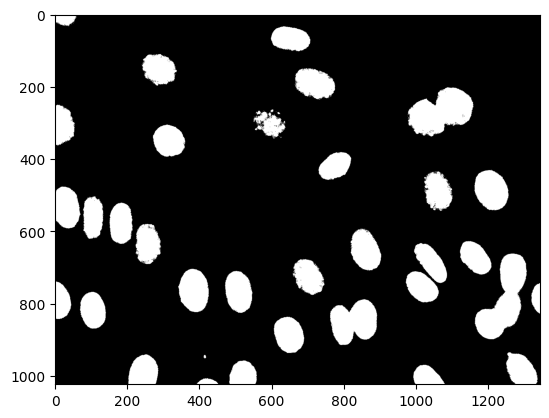

In [21]:
img2=plt.imread("data/NIH3T3/im/dna-0.png")
segmented_image2 = otsu_thresholding(img2)
plt.imshow(segmented_image2, "gray")

The result should be the same as in your [otsu.ipynb](otsu.ipynb) notebook.

**[Task 2.4.]()** Perform batch processing:

In [28]:
# List to store Dice coefficients
dice_coefficients = []

for i in [28, 29, 33, 44, 46, 49]:
    # Load images
    img3 = plt.imread(f"data/NIH3T3/im/dna-{i}.png")
    ground_truth3 = plt.imread(f"data/NIH3T3/gt/{i}.png")
    
    # Perform Otsu thresholding
    otsu_image = otsu_thresholding(img3)
    
    # Compute Dice coefficient
    dice_coeff_img3 = compute_dice(otsu_image, ground_truth3)
    
    # Append the Dice coefficient to the list
    dice_coefficients.append(dice_coeff_img3)
    
    # Print Dice coefficient for the current image
    print(f"Image: {i}, Dice: {dice_coeff_img3}")

# Compute and print the mean Dice coefficient
mean_dice_coeff = np.mean(dice_coefficients)
print(f"Mean Dice coefficient for all images: {mean_dice_coeff}")

Image: 28, Dice: 0.7528567225654604
Image: 29, Dice: 0.647632667167185
Image: 33, Dice: 0.42998864378556173
Image: 44, Dice: 0.5789127665023891
Image: 46, Dice: 0.07605520913993832
Image: 49, Dice: 0.7965485556767932
Mean Dice coefficient for all images: 0.5469990941395547
